In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [24]:
files = glob.glob('../Output/ICA/*.csv')
files.sort()
files.append(files.pop(files.index('../Output/ICA/Clustering_fit_time.csv')))

In [25]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/ICA/BreastC Silhouette.csv',
 1: '../Output/ICA/BreastC acc.csv',
 2: '../Output/ICA/BreastC adjMI.csv',
 3: '../Output/ICA/BreastC2D.csv',
 4: '../Output/ICA/CreditCardF Silhouette.csv',
 5: '../Output/ICA/CreditCardF acc.csv',
 6: '../Output/ICA/CreditCardF adjMI.csv',
 7: '../Output/ICA/CreditCardF2D.csv',
 8: '../Output/ICA/SSE.csv',
 9: '../Output/ICA/logliklihood.csv',
 10: '../Output/ICA/Clustering_fit_time.csv'}

In [26]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - CCF:  **dfs[4]** 

acc - CCF:  **dfs[5]**

adjMI - CCF:  **dfs[6]**

Visualize dataset in 2D - CCF:  **dfs[7]**

In [27]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_ari = dfs[1].T[1:]
bc_NMI = dfs[2].T[1:]
bc_2d = dfs[3]

ccf_ss = dfs[4].T[1:]
ccf_ari = dfs[5].T[1:]
ccf_NMI = dfs[6].T[1:]
ccf_2d = dfs[7]

In [28]:
time_file="../Clustering_fit_time_ICA.csv"
dfs[10]=pd.read_csv(time_file)
print(dfs[10].head(10))




   Unnamed: 0   k  BC_kmean     BC_em  CCF_kmean    CCF_em
0           0   2  0.129103  0.008729   0.040362  0.005343
1           1   3  0.268039  0.015792   0.055034  0.047923
2           2   4  0.219535  0.011250   0.070757  0.083148
3           3   5  0.178250  0.015963   0.048060  0.033142
4           4   6  0.240986  0.040907   0.062659  0.030128
5           5   7  0.159037  0.021029   0.087811  0.117751
6           6   8  0.103923  0.023936   0.115035  0.037018
7           7   9  0.213471  0.042546   0.129366  0.045799
8           8  10  0.259092  0.032878   0.154268  0.065046


In [29]:
fit_time=dfs[10]
fit_time.columns=["-","k","BC_kmean","BC_EM", "CCF_kmean", "CCF_EM"]
bc_kmean_fit_time= fit_time["BC_kmean"]
bc_em_fit_time= fit_time["BC_EM"]
ccf_kmean_fit_time= fit_time["CCF_kmean"]
ccf_em_fit_time= fit_time["CCF_EM"]
cluster_number= fit_time["k"]

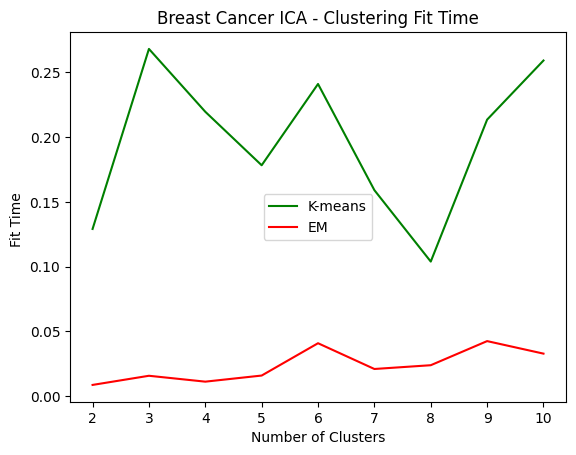

In [30]:
plt.plot(cluster_number,bc_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,bc_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Breast Cancer ICA - Clustering Fit Time')
plt.savefig('Breast Cancer ICA - Clustering Fit Time')

plt.show()

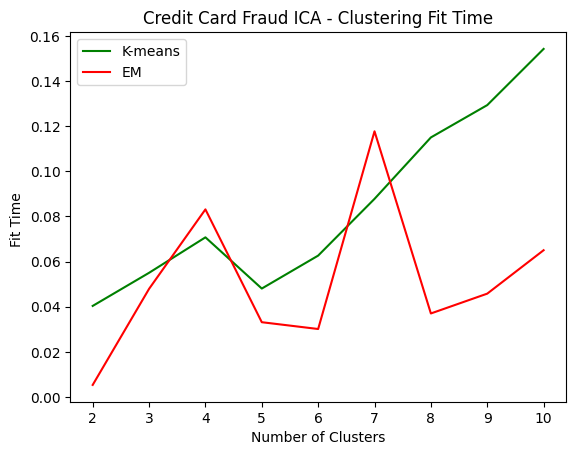

In [31]:
plt.plot(cluster_number,ccf_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,ccf_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Credit Card Fraud ICA - Clustering Fit Time')
plt.savefig('Credit Card Fraud ICA - Clustering Fit Time')

plt.show()

# Choosing K
## K-Means SSE: (Breast Cancer & Credit Card Fraud)

In [32]:
km_SSE.columns = ['clusters','ccf_sse', 'bc_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
ccf_y = km_SSE['ccf_sse']
km_SSE.head()

,clusters,ccf_sse,bc_sse
0,2,1742.963121,6465.066388
1,3,1150.867405,6233.078963
2,4,578.887277,5977.998240
3,5,442.939312,5708.022249
4,6,385.266374,5557.377466


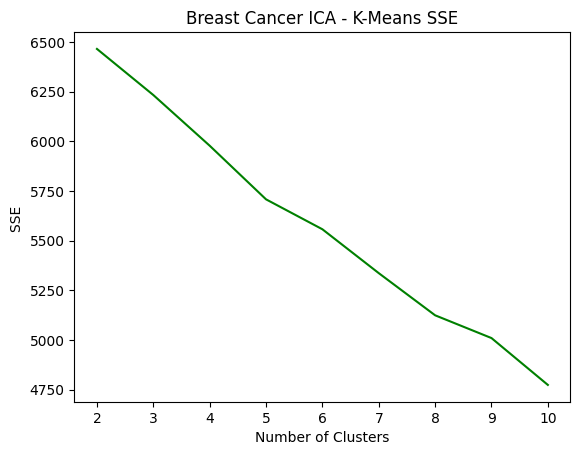

In [33]:
plt.plot(x,bc_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - K-Means SSE')
plt.savefig('Breast Cancer ICA - K-Means SSE')

plt.show()

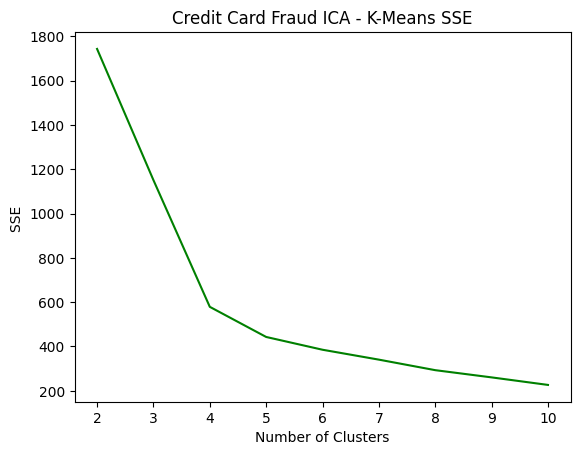

In [34]:
plt.plot(x,ccf_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud ICA - K-Means SSE')
plt.savefig('Credit Card Fraud ICA - K-Means SSE')


plt.show()

## EM Log-Likelihood: (Breast Cancer & Credit Card Fraud)

In [35]:
gmm_log.columns = ['clusters','ccf_sse','bc_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
ccf_y = gmm_log['ccf_sse']
gmm_log.head()

,clusters,ccf_sse,bc_log
0,2,-2.927790,-18.958783
1,3,-2.094263,-18.255985
2,4,-1.252359,-17.666360
3,5,-1.150249,-17.858390
4,6,-1.141969,-16.690341


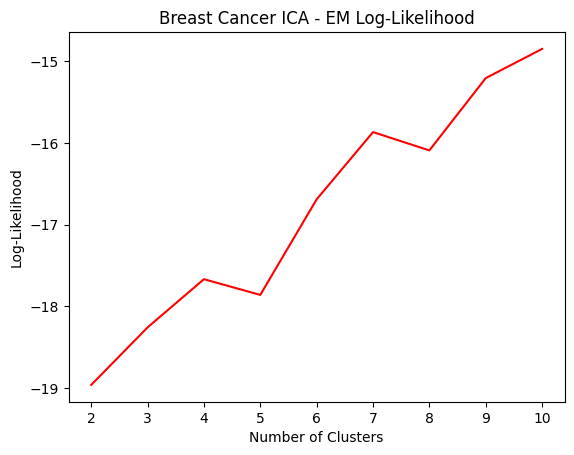

In [36]:
plt.plot(x,bc_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - EM Log-Likelihood')
plt.savefig('Breast Cancer ICA - EM Log-Likelihood')


plt.show()

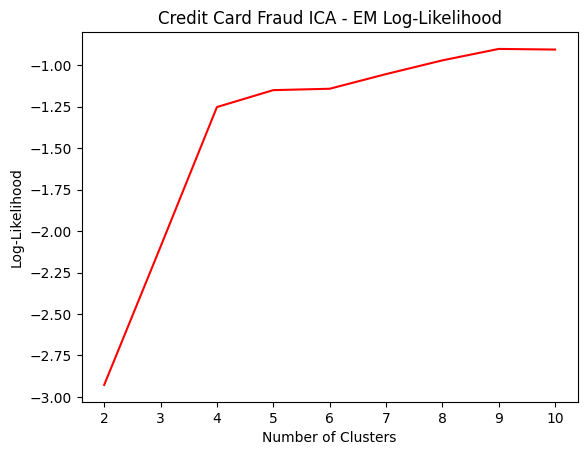

In [37]:
plt.plot(x,ccf_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud ICA - EM Log-Likelihood')
plt.savefig('Credit Card Fraud ICA - EM Log-Likelihood')


plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [38]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.204581,0.110782,2
3,0.117171,0.061861,3
4,0.067617,0.078713,4
5,0.048593,0.065106,5
6,0.019014,0.037848,6


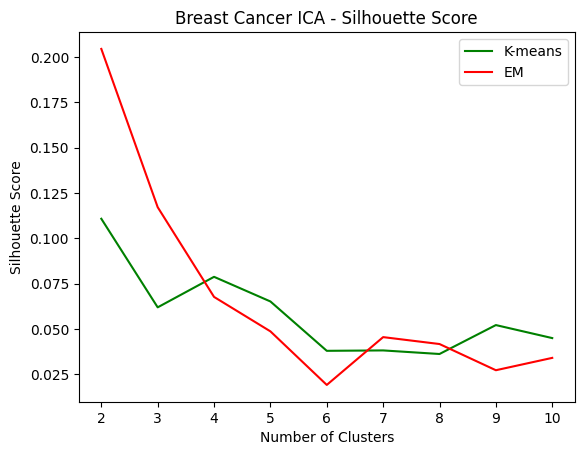

In [39]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Silhouette Score')
plt.legend()
plt.savefig('Breast Cancer ICA - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [40]:
bc_ari['clusters'] = bc_ari.index
bc_ari.columns = ['gmm_ari','km_ari','clusters']
x = bc_ari['clusters']
gmm_y = bc_ari['gmm_ari']
km_y = bc_ari['km_ari']
bc_ari.head()

,gmm_ari,km_ari,clusters
2,0.109879,0.77481,2
3,0.151664,0.201247,3
4,0.274192,0.55041,4
5,0.612197,0.396092,5
6,0.599345,0.751415,6


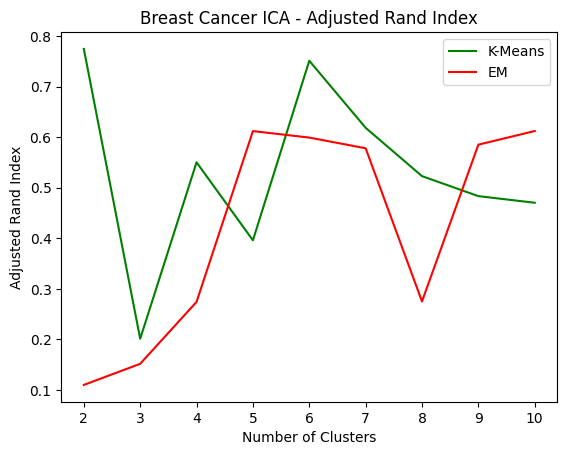

In [41]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Adjusted Rand Index')
plt.legend()
plt.savefig('Breast Cancer ICA - Adjusted Rand Index')


plt.show()

## Adjusted MI: K-Means and EM

In [42]:
bc_NMI['clusters'] = bc_NMI.index
bc_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_NMI['gmm_NMI']
km_y = bc_NMI['km_NMI']

NameError: name 'bc_adjMI' is not defined

In [ ]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Normalized Mutual Information')
plt.legend()
plt.savefig('Breast Cancer ICA - Normalized Mutual Information')


plt.show()

# Credit Card Fraud  Dataset

## Silhouette Score: K-Means and EM

In [ ]:
ccf_ss['clusters'] = bc_ss.index
ccf_ss.columns = ['gmm_ss','km_ss','clusters']
x = ccf_ss['clusters']
gmm_y = ccf_ss['gmm_ss']
km_y = ccf_ss['km_ss']
ccf_ss.head()

In [ ]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud ICA - Silhouette Score')
plt.legend()
plt.savefig('Credit Card Fraud ICA - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [ ]:
ccf_ari['clusters'] = ccf_ari.index
ccf_ari.columns = ['gmm_ari','km_ari','clusters']
x = ccf_ari['clusters']
gmm_y = ccf_ari['gmm_ari']
km_y = ccf_ari['km_ari']
ccf_ari.head()

In [ ]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud ICA - Adjusted Rand Index')


plt.legend()
plt.savefig('Credit Card Fraud ICA - Adjusted Rand Index')


plt.show()

## Adjusted MI: K-Means and EM

In [ ]:
ccf_NMI['clusters'] = ccf_NMI.index
ccf_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = ccf_NMI['clusters']
gmm_y = ccf_NMI['gmm_NMI']
km_y = ccf_NMI['km_NMI']

In [ ]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud ICA - Normalized Mutual Information')
plt.legend()
plt.savefig('Credit Card Fraud ICA - Normalized Mutual Information')


plt.show()

## 2D Visualizaion

In [ ]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

## ICA Analyses

In [ ]:
files1 = glob.glob('../Output/ICA/ICA/*scree.csv')
files1.sort()

In [ ]:
files1 = dict(enumerate(files1))
files1

In [ ]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Components","Kurtosis"])

In [ ]:
# bc_cluster = dfs1[0]
bc_scree = dfs1[0][1:15]
# f_cluster = dfs1[2]
ccf_scree = dfs1[1][1:15]

In [ ]:
height = bc_scree["Kurtosis"]
bars = bc_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title('Breast Cancer ICA Kurtosis')
plt.bar(y_pos,height, color='green')
plt.xticks(y_pos, bars)
plt.savefig('Breast Cancer ICA Kurtosis')


plt.show()


In [ ]:
height = ccf_scree["Kurtosis"]
bars = ccf_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title('Credit Card Fraud ICA Kurtosis')
plt.bar(y_pos,height, color="green")
plt.xticks(y_pos, bars)
plt.savefig('Credit Card Fraud ICA Kurtosis')


plt.show()